In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'module2-sampling-confidence-intervals-and-hypothesis-testing'))
	# print(os.getcwd())
except:
	pass


 ## Assignment - Build a confidence interval

 A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

 52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

 In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

 But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

 How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

 For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

 Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

 Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


 ### Confidence Intervals:
 1. Generate and numerically represent a confidence interval
 2. Graphically (with a plot) represent the confidence interval
 3. Interpret the confidence interval - what does it tell you about the data and its distribution?

 ### Chi-squared tests:
 4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
   - By hand using Numpy
   - In a single line using Scipy


In [2]:

import numpy
import scipy.stats as stats
import pandas
import matplotlib.pyplot as pyplot

cols = ['party','handicapped-infants','water-project',
		'budget','physician-fee-freeze', 'el-salvador-aid',
		'religious-groups','anti-satellite-ban',
		'aid-to-contras','mx-missile','immigration',
		'synfuels', 'education', 'right-to-sue','crime','duty-free',
		'south-africa']
get_ipython().system('wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')


df = pandas.read_csv('house-votes-84.data',
               header=None,
               names=cols).replace({'?':numpy.NaN, 'n':0, 'y':1})
df.head()



--2019-09-17 15:39:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Server file no newer than local file ‘house-votes-84.data’ -- not retrieving.



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [3]:

partyStats = {}
democrats = df[df['party']=='democrat']
republicans = df[df['party']=='republican']
for party in ['democrat', 'republican']:
	partyData = df[df['party']==party]
	partyStats[party] = {'means': [],
					'confidence_intervals': [],
					'standard_errors': [],
					'margins_of_error': []}
	for column in cols[1:]:
		n = partyData[column].count()
		dof = n - 1
		mean = partyData[column].mean()
		std_err = numpy.std(partyData[column],ddof=1) / numpy.sqrt(n)
		confidence_interval = stats.t.interval(0.95, dof, loc=mean, scale=std_err)
		margin_of_error = std_err * stats.t.ppf(0.975, dof)

		partyStats[party]['means'].append(mean)
		partyStats[party]['confidence_intervals'].append(confidence_interval)
		partyStats[party]['margins_of_error'].append(margin_of_error)
		partyStats[party]['standard_errors'].append(std_err)



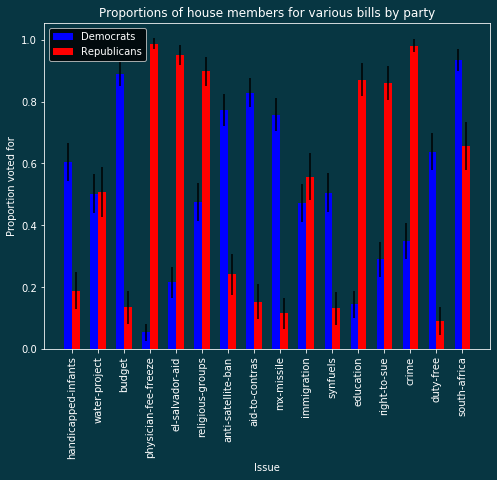

In [4]:

x = numpy.arange(len(cols[1:]))
width = 0.3

pyplot.bar(x-width/2, partyStats['democrat']['means'], width=width, yerr=partyStats['democrat']['margins_of_error'], color='blue', ecolor='black', label='Democrats')
pyplot.bar(x+width/2, partyStats['republican']['means'], width=width, yerr=partyStats['republican']['margins_of_error'], color='red', ecolor='black', label='Republicans')
figure = pyplot.gcf()
figure.set_size_inches((8,6))
figure.patch.set(facecolor='#073642')
figure.axes[0].patch.set(facecolor='#073642')

pyplot.xticks(x, cols[1:], rotation='vertical')

pyplot.ylabel('Proportion voted for')
pyplot.xlabel('Issue')
pyplot.title('Proportions of house members for various bills by party')
pyplot.legend()

pyplot.show()


In [6]:
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')


--2019-09-17 15:39:58--  https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644953 (630K) [text/plain]
Last-modified header missing -- time-stamps turned off.
--2019-09-17 15:39:58--  https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 644953 (630K) [text/plain]
Saving to: ‘ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo

In [7]:
gdp_per_capita = pandas.read_csv('ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
life_expectancy = pandas.read_csv('ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population_total = pandas.read_csv('ddf--datapoints--population_total--by--geo--time.csv')
entities = pandas.read_csv('ddf--entities--geo--country.csv')
concepts = pandas.read_csv('ddf--concepts.csv')


In [8]:
merged_geotime = pandas.merge(gdp_per_capita,
						pandas.merge(life_expectancy,
									population_total,
									on=['geo', 'time']
									),
						on=['geo', 'time']
						)

merged = pandas.merge(merged_geotime,
						entities[['country','gapminder_list','world_4region','world_6region','name']],
						left_on='geo',
						right_on='country'
						).rename(
							columns={'income_per_person_gdppercapita_ppp_inflation_adjusted': 'gdp_per_capita'})


In [9]:
gdp_bins = pandas.qcut(merged['gdp_per_capita'], 20)
le_bins = pandas.cut(merged['life_expectancy_years'], 20)
gdp_region_crosstab = pandas.crosstab(gdp_bins, merged['world_6region'], margins=True)
le_region_crosstab = pandas.crosstab(le_bins, merged['world_6region'], margins=True)

le_region_crosstab

world_6region,america,east_asia_pacific,europe_central_asia,middle_east_north_africa,south_asia,sub_saharan_africa,All
life_expectancy_years,,,,,,,
"(0.917, 5.158]",0,2,1,1,0,3,7
"(5.158, 9.317]",0,5,4,2,3,5,19
"(9.317, 13.476]",1,2,5,3,3,38,52
"(13.476, 17.634]",1,5,20,4,0,13,43
"(17.634, 21.792]",9,10,72,3,34,5,133
"(21.792, 25.951]",268,618,363,248,328,423,2248
"(25.951, 30.11]",860,964,767,634,264,1427,4916
"(30.11, 34.268]",2100,1568,607,1849,474,4432,11030
"(34.268, 38.427]",811,388,2760,191,111,775,5036


In [10]:
d = {'Life Expectancy vs Region': le_region_crosstab, 
	'GDP vs Region': gdp_region_crosstab}
for key in d:
	observed = d[key]
	expected = observed.copy()
	for column, values in observed.items():
		for row in values.index:
			expected.loc[row, column] = expected.loc['All', column] * expected.loc[row, 'All'] / expected.loc['All', 'All']

	chi_squared_dof = (expected.shape[0]-1) * (expected.shape[1]-1)

	print(f'Chi-Squared information for {key}')

	print('numpy-calculated:')
	chi_squared = ((numpy.array(observed) - numpy.array(expected))**2/numpy.array(expected)).sum() 
	print(f'\tChi-Squared: {chi_squared} ({chi_squared_dof} degrees of freedom)')

	critical = stats.chi2.ppf(q=0.95, df=chi_squared_dof)
	print(f'\tCritical value for {chi_squared_dof} degrees of freedom at p < 0.05: {critical}')

	print('scipy-calculated:')
	chi_squared, p, chi_squared_dof, _ = stats.chi2_contingency(observed)
	print(f'\tChi-Squared: {chi_squared} ({chi_squared_dof} degrees of freedom)')
	print(f'\tp = {p}')
	print(f'We are confident (p < 0.05) that there is an association in {key}.\n')


Chi-Squared information for Life Expectancy vs Region
numpy-calculated:
	Chi-Squared: 10951.03990391922 (120 degrees of freedom)
	Critical value for 120 degrees of freedom at p < 0.05: 146.56735758076744
scipy-calculated:
	Chi-Squared: 10951.039903919218 (120 degrees of freedom)
	p = 0.0
We are confident (p < 0.05) that there is an association in Life Expectancy vs Region.

Chi-Squared information for GDP vs Region
numpy-calculated:
	Chi-Squared: 15351.473361831417 (120 degrees of freedom)
	Critical value for 120 degrees of freedom at p < 0.05: 146.56735758076744
scipy-calculated:
	Chi-Squared: 15351.473361831415 (120 degrees of freedom)
	p = 0.0
We are confident (p < 0.05) that there is an association in GDP vs Region.



 ## Stretch goals:

 1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
 2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
 3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

 ## Resources

 - [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
 - [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
 - [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
 - [expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)